In [1]:
import random
import pandas as pd
from datasets import Dataset
import os 
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig
from datasets import load_dataset
import seaborn as sns
from datasets import load_dataset, load_from_disk
import numpy as np
import json

In [2]:
pwd

'/home/al2644/research/codebase/reasoning/perturb-r/notebook/math8k'

In [3]:
cd /home/al2644/research/codebase/reasoning/perturb-r

/home/al2644/research/codebase/reasoning/perturb-r


In [24]:
dataset_name = "GAIR/LIMO"
dataset = load_dataset(dataset_name)
df = pd.DataFrame(dataset["train"])

In [28]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-3B")

def count(conversations: list):
    return len(tokenizer.apply_chat_template(conversations))

def convert_to_convs(example):
    question = example["question"]
    response = example["solution"]
    return [
        {'role': 'user', 'content': question},
        {'role': 'assistant', 'content': response}
    ]

In [ ]:
df["conversations"] = df.apply(convert_to_convs, axis = 1)

In [39]:
df

,question,solution,answer,conversations,token_len
0,Find the last three digits of the product of t...,"Okay, so I need to find the last three digits ...",25,"[{'role': 'user', 'content': 'Find the last th...",2324
1,For how many pairs of consecutive integers in ...,"Okay, so the problem is asking: How many pairs...",156,"[{'role': 'user', 'content': 'For how many pai...",11698
2,"Given a triangle, its midpoint triangle is obt...","Okay, let me try to understand this problem st...",101,"[{'role': 'user', 'content': 'Given a triangle...",8506
3,Set $A$ consists of $m$ consecutive integers w...,"Okay, so I need to solve this problem where th...",201,"[{'role': 'user', 'content': 'Set $A$ consists...",2077
4,Let $S$ be the set of all positive rational nu...,"Okay, so the problem is about finding all posi...",719,"[{'role': 'user', 'content': 'Let $S$ be the s...",4416
...,...,...,...,...,...
812,The number $r$ can be expressed as a four-plac...,"Okay, so I need to figure out this problem whe...",417,"[{'role': 'user', 'content': 'The number $r$ c...",7584
813,Let $N = \sum_{k = 1}^{1000} k ( \lceil \log_{...,"Okay, so I need to find the remainder when N i...",477,"[{'role': 'user', 'content': 'Let $N = \sum_{k...",2349
814,"In trapezoid $ABCD$ , leg $\overline{BC}$ is p...","Okay, so I have this trapezoid problem here. L...",110,"[{'role': 'user', 'content': 'In trapezoid $AB...",3870
815,Let $x=\frac{4}{(\sqrt{5}+1)(\sqrt[4]{5}+1)(\s...,"Alright, let's try to tackle this problem. The...",125,"[{'role': 'user', 'content': 'Let $x=\frac{4}{...",4032


In [30]:
df['token_len'] = df["conversations"].apply(count)

<Axes: xlabel='token_len', ylabel='Count'>

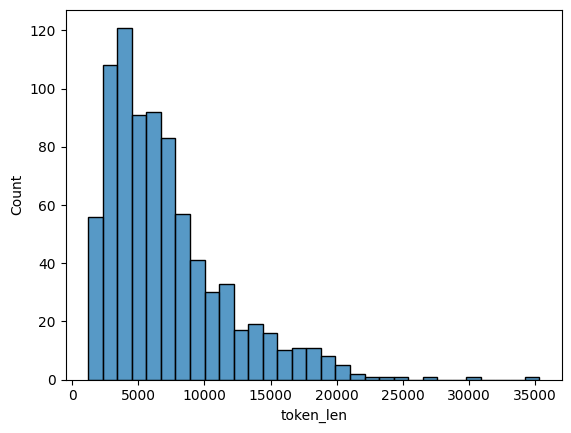

In [35]:
sns.histplot(df["token_len"])

In [38]:
df[df["token_len"]<16000]

,question,solution,answer,conversations,token_len
0,Find the last three digits of the product of t...,"Okay, so I need to find the last three digits ...",25,"[{'role': 'user', 'content': 'Find the last th...",2324
1,For how many pairs of consecutive integers in ...,"Okay, so the problem is asking: How many pairs...",156,"[{'role': 'user', 'content': 'For how many pai...",11698
2,"Given a triangle, its midpoint triangle is obt...","Okay, let me try to understand this problem st...",101,"[{'role': 'user', 'content': 'Given a triangle...",8506
3,Set $A$ consists of $m$ consecutive integers w...,"Okay, so I need to solve this problem where th...",201,"[{'role': 'user', 'content': 'Set $A$ consists...",2077
4,Let $S$ be the set of all positive rational nu...,"Okay, so the problem is about finding all posi...",719,"[{'role': 'user', 'content': 'Let $S$ be the s...",4416
...,...,...,...,...,...
812,The number $r$ can be expressed as a four-plac...,"Okay, so I need to figure out this problem whe...",417,"[{'role': 'user', 'content': 'The number $r$ c...",7584
813,Let $N = \sum_{k = 1}^{1000} k ( \lceil \log_{...,"Okay, so I need to find the remainder when N i...",477,"[{'role': 'user', 'content': 'Let $N = \sum_{k...",2349
814,"In trapezoid $ABCD$ , leg $\overline{BC}$ is p...","Okay, so I have this trapezoid problem here. L...",110,"[{'role': 'user', 'content': 'In trapezoid $AB...",3870
815,Let $x=\frac{4}{(\sqrt{5}+1)(\sqrt[4]{5}+1)(\s...,"Alright, let's try to tackle this problem. The...",125,"[{'role': 'user', 'content': 'Let $x=\frac{4}{...",4032


In [40]:
conv = [{'role': 'user', 'content': 'Find the last three digits of the product of the positive roots of $\\sqrt{1995}x^{\\log_{1995}x}=x^2.$'}, {'role': 'assistant', 'content': '<think>\nOkay, so I need to find the last three digits of the product of the positive roots of the equation √(1995) * x^(log_{1995} x) = x². Hmm, let\'s see. First, let me try to understand the equation and figure out how to solve it. \n\nThe equation is given as √(1995) * x^(log_{1995} x) = x². That looks a bit complicated with the logarithm in the exponent. Maybe I can take logarithms on both sides to simplify it? Or perhaps rewrite the equation using properties of exponents and logarithms. \n\nLet me recall that log_b a = (ln a)/(ln b), so log_{1995} x is equal to (ln x)/(ln 1995). Also, x raised to log_{1995} x can be rewritten using exponentials. Wait, maybe I can express x^(log_{1995} x) as e^{(ln x) * (log_{1995} x)}. But that might not be helpful. Let me think differently.\n\nAlternatively, since the equation has x in the exponent and also x squared, maybe substituting t = log_{1995} x would help. Let me try that. Let’s set t = log_{1995} x, which means that x = 1995^t. Then substituting back into the equation:\n\n√(1995) * (1995^t)^{t} = (1995^t)^2\n\nSimplify both sides:\n\nLeft side: √(1995) * 1995^{t^2}\n\nRight side: 1995^{2t}\n\nSince 1995 is a positive real number, we can equate the exponents on both sides, but first, let\'s express √(1995) as 1995^{1/2}. So the left side becomes 1995^{1/2} * 1995^{t^2} = 1995^{t^2 + 1/2}\n\nThe right side is 1995^{2t}\n\nTherefore, since the bases are the same and positive, we can set the exponents equal:\n\nt^2 + 1/2 = 2t\n\nThat simplifies to t^2 - 2t + 1/2 = 0. Hmm, quadratic equation. Let\'s solve for t:\n\nt = [2 ± sqrt(4 - 2)] / 2 = [2 ± sqrt(2)] / 2 = 1 ± (sqrt(2)/2)\n\nSo t = 1 + (√2)/2 or t = 1 - (√2)/2\n\nBut t was defined as log_{1995} x. Therefore, x = 1995^t. So the two solutions for x are:\n\nx1 = 1995^{1 + (√2)/2} and x2 = 1995^{1 - (√2)/2}\n\nTherefore, the positive roots are x1 and x2 as above. The problem asks for the product of the positive roots, which is x1 * x2.\n\nLet\'s compute that product:\n\nx1 * x2 = 1995^{1 + (√2)/2} * 1995^{1 - (√2)/2} = 1995^{(1 + (√2)/2 + 1 - (√2)/2)} = 1995^{2}\n\nBecause the exponents add up to 1 + 1 + (√2)/2 - (√2)/2 = 2. So the product is 1995 squared. Therefore, the product is 1995². Then we need to find the last three digits of this product.\n\nSo the problem reduces to computing 1995² mod 1000. That is, find the last three digits of 1995 squared.\n\nTo compute 1995² mod 1000, note that 1995 mod 1000 is 995. So 1995 = 1000 + 995. Therefore, 1995² = (1000 + 995)² = 1000² + 2*1000*995 + 995².\n\nCompute each term modulo 1000:\n\n1000² mod 1000 = 0\n\n2*1000*995 mod 1000 = (2000*995) mod 1000. Since 2000 mod 1000 = 0, this term is also 0.\n\nSo 1995² mod 1000 ≡ 995² mod 1000.\n\nTherefore, compute 995² mod 1000.\n\nCompute 995²: 995*995. Let\'s compute this.\n\nNote that 995 = 1000 - 5. So (1000 - 5)^2 = 1000² - 2*1000*5 + 5² = 1,000,000 - 10,000 + 25 = 990,025.\n\nTherefore, 995² = 990,025. Then 990,025 mod 1000 is 025. So the last three digits are 025.\n\nBut wait, let me verify that. 990,025 divided by 1000 is 990 with a remainder of 25, so yes, the last three digits are 025. Therefore, 1995² mod 1000 is 025.\n\nTherefore, the last three digits of the product of the positive roots are 025.\n\nBut wait, let me double-check. Maybe I made a mistake in calculating 995 squared. Let\'s do it step by step:\n\n995 * 995:\n\nFirst, compute 1000 * 1000 = 1,000,000\n\nSubtract 5 * 1000 = 5,000\n\nSubtract 5 * 1000 = 5,000\n\nAdd 5 * 5 = 25\n\nWait, that\'s using the formula (a - b)^2 = a² - 2ab + b². So (1000 - 5)^2 = 1000² - 2*1000*5 + 5² = 1,000,000 - 10,000 + 25 = 990,025. Correct. So 990,025. The last three digits are indeed 025. So 025. Therefore, the answer should be 025. But leading zeros are usually not written, but since the question asks for the last three digits, we need to include the leading zero. So the last three digits are 025.\n\nBut let me confirm once again. Suppose I compute 995 * 995 directly:\n\n995 * 995:\n\nBreak it down as (1000 - 5)(1000 - 5) = 1000*1000 - 5*1000 - 5*1000 + 5*5 = 1,000,000 - 5,000 - 5,000 + 25 = 1,000,000 - 10,000 + 25 = 990,000 + 25 = 990,025. Yep, that\'s correct.\n\nTherefore, 1995 squared is 1995*1995. But since 1995 = 2000 - 5, maybe compute (2000 - 5)^2 = 2000² - 2*2000*5 + 5² = 4,000,000 - 20,000 + 25 = 3,980,025. Wait, that can\'t be. Wait, 2000² is 4,000,000, minus 2*2000*5 = 20,000, so 4,000,000 - 20,000 = 3,980,000, plus 25 is 3,980,025. So 1995² is 3,980,025. Then the last three digits are 025. So that\'s correct. Therefore, the last three digits are 025.\n\nTherefore, the answer is 025, which in boxed form is \\boxed{025}.\n\nBut wait, hold on. Let me check if the problem is indeed asking for the product of the positive roots. In the original equation, we found two positive roots, x1 and x2, whose product is 1995². Therefore, their product is 1995², whose last three digits are 025, as we found. So the answer is 025. But in some contexts, when asked for the last three digits, leading zeros are included, so 025 is correct. However, sometimes they might write it as 25, but since it\'s three digits, 025 is appropriate. \n\nWait, but let me check once again the problem statement: "Find the last three digits of the product of the positive roots..." So yes, the last three digits. Therefore, 025 is the correct answer. Therefore, the final answer is \\boxed{025}.\n\n**Final Answer**\n\\boxed{025}'}]

In [43]:
len(tokenizer.apply_chat_template(conv))

2327